<a href="https://colab.research.google.com/github/E23A48/TF_MachineLearning/blob/main/TF_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TF**
**MACHINE LEARNING**
2020-2

Integrantes:
*   Piero Herrera
*   Camilo Silva
*   Diego Urrutia

#**Introducción :**

#**Convolutional Neural Network**

In [96]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [97]:
dirname = os.path.join(os.getcwd(), 'fruits')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0


for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
           
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)


Directorios leidos: 6
Imagenes en cada directorio [493, 427, 492, 565, 492, 479]


In [98]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  2948


In [99]:
fruits=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    fruits.append(name[len(name)-1])
    indice=indice+1

0 Apple
1 Avocado
2 Nectarine
3 Mango
4 Apple Golden 2
5 Apple Golden


In [100]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [101]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (2358, 100, 100, 3) (2358,)
Testing data shape :  (590, 100, 100, 3) (590,)


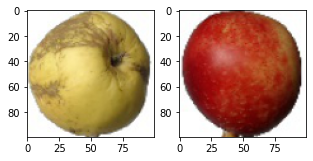

In [102]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')


In [103]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [104]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1.]


In [105]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)


(1886, 100, 100, 3) (472, 100, 100, 3) (1886, 6) (472, 6)


In [106]:
epochs = 6
batch_size = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100,100,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 
model.add(Dense(nClasses, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2560032   
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32)               

In [107]:
model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))



Epoch 1/6
95/95 [==============================] - 17s 179ms/step - loss: 1.8864 - accuracy: 0.6585 - val_loss: 0.1318 - val_accuracy: 0.9767
Epoch 2/6
95/95 [==============================] - 20s 211ms/step - loss: 0.2371 - accuracy: 0.9258 - val_loss: 0.1700 - val_accuracy: 0.9555
Epoch 3/6
95/95 [==============================] - 17s 177ms/step - loss: 0.1390 - accuracy: 0.9666 - val_loss: 0.0784 - val_accuracy: 0.9852
Epoch 4/6
95/95 [==============================] - 17s 177ms/step - loss: 0.1199 - accuracy: 0.9719 - val_loss: 0.0472 - val_accuracy: 0.9979
Epoch 5/6
95/95 [==============================] - 17s 177ms/step - loss: 0.0901 - accuracy: 0.9852 - val_loss: 0.0580 - val_accuracy: 0.9979
Epoch 6/6
95/95 [==============================] - 17s 177ms/step - loss: 0.0825 - accuracy: 0.9793 - val_loss: 0.0554 - val_accuracy: 0.9958


In [108]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

19/19 [==============================] - 1s 77ms/step - loss: 0.0135 - accuracy: 0.9966
Test loss: 0.01354164257645607
Test accuracy: 0.996610164642334


In [110]:
predicted_classes2 = model.predict(test_X)

predicted_classes=[]
for predicted_fruit in predicted_classes2:
    predicted_classes.append(predicted_fruit.tolist().index(max(predicted_fruit)))
predicted_classes=np.array(predicted_classes)

Found 588 correct labels


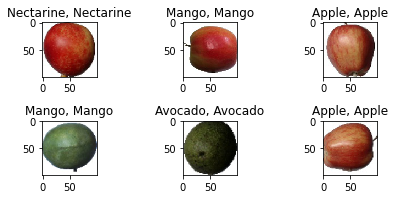

In [111]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(fruits[predicted_classes[correct]],
                                                    fruits[test_Y[correct]]))

    plt.tight_layout()

Found 2 incorrect labels


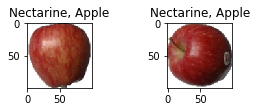

In [113]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(fruits[predicted_classes[incorrect]],
                                                    fruits[test_Y[incorrect]]))
    plt.tight_layout()

In [114]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99       104
     Class 1       1.00      1.00      1.00        89
     Class 2       0.98      1.00      0.99        98
     Class 3       1.00      1.00      1.00       111
     Class 4       1.00      1.00      1.00        95
     Class 5       1.00      1.00      1.00        93

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590



In [131]:
import cv2
import numpy as np
import os


In [132]:
train_path = 'fruits'

training_names = os.listdir(train_path)

image_paths = []
#Etiquetas
image_classes = []

class_id = 0


def imglist(path):
    return [os.path.join(path,f) for f in os.listdir(path)]

#Lectura de las carpetas
for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    image_paths += class_path
    image_classes += [class_id]*len(class_path)
    class_id += 1

In [ ]:
des_list = []

brisk = cv2.BRISK_create(30)

for image_path in image_paths:
  im = cv2.imread(image_path)
  kpts, des = brisk.detectAndCompute(im,None)
  des_list.append((image_path,des))

descriptors = des_list[0][1]
for image_path , descriptor in des_list[1:]:
  descriptors = np.hstack((descriptors,descriptor))

descriptors_float = descriptors.astype(float)





In [ ]:
#Kmeans

from scipy.cluster.vq import kmeans ,vq

k = 60
voc,variance = kmeans(descriptors_float,k,1)

im_features = np.zeros((len(image_paths),k), "float32")

for i in range(len(image_paths)):
      words,distance = vq(des_list[i][1],voc)
      for w in words:
        im_features[i][w] += 1